Plots example shapes at selected timesteps.

Copyright: 2022, Mitja Jančič for Jožef Stefan Institute

# Import libs

In [1]:
import numpy as np
import h5py as h5
import matplotlib.pyplot as plt
from numpy import true_divide
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib
from sklearn.neighbors import KDTree

/home/mjancic/.local/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# from matplotlib import interactive

# interactive(True)
# %matplotlib qt

In [3]:
plt.rcParams.update({
    "mathtext.fontset": "cm",
    "font.family": "STIXGeneral",
    "text.usetex": False,
    "axes.formatter.use_mathtext": True,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "axes.labelsize": 14
})

# Import data

In [4]:
def order_points(positions):
    # Sort points.
    angles = np.arctan2(positions[1], positions[0])
    idx = np.argsort(angles)

    pos = positions[:,idx]

    return pos

DENDRITE H 0.028013567611988685
0.6998489415594333
../data/FVM/surfaces/Eqx2D_Om0p18_G2_d1.0_m0.025/postProcessing/surfaces/0.7/alpha1_interpolatedIso.raw
2.0995468246783
../data/FVM/surfaces/Eqx2D_Om0p18_G2_d1.0_m0.025/postProcessing/surfaces/2.1/alpha1_interpolatedIso.raw
3.599223128019943
../data/FVM/surfaces/Eqx2D_Om0p18_G2_d1.0_m0.025/postProcessing/surfaces/3.6/alpha1_interpolatedIso.raw
4.998921011138809
../data/FVM/surfaces/Eqx2D_Om0p18_G2_d1.0_m0.025/postProcessing/surfaces/5/alpha1_interpolatedIso.raw
6.4985973144804525
../data/FVM/surfaces/Eqx2D_Om0p18_G2_d1.0_m0.025/postProcessing/surfaces/6.5/alpha1_interpolatedIso.raw
7.898295197599319
../data/FVM/surfaces/Eqx2D_Om0p18_G2_d1.0_m0.025/postProcessing/surfaces/7.9/alpha1_interpolatedIso.raw
9.397971500940962
../data/FVM/surfaces/Eqx2D_Om0p18_G2_d1.0_m0.025/postProcessing/surfaces/9.4/alpha1_interpolatedIso.raw
0.028013567611988685
0.6998489415594333
2.0995468246783
3.599223128019943
4.998921011138809
6.4985973144804525
7.898

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


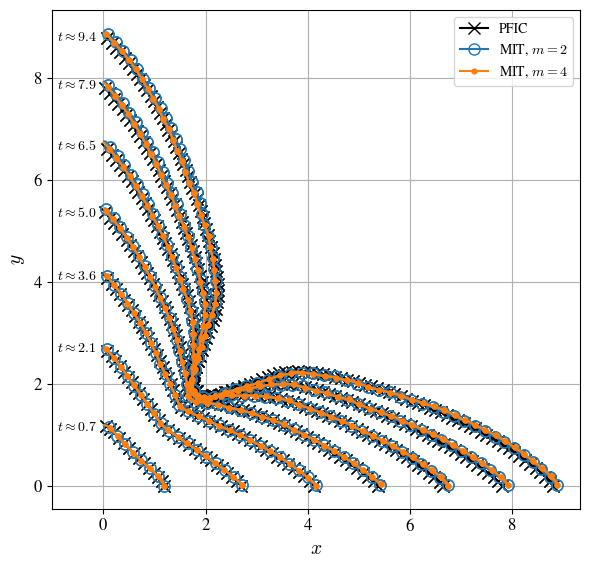

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
text_displacements = [0.1, 0.1, 0.12, 0.15, 0.15, 0.12, 0.15]

source_files = ['../data/spline2/spline2_results_000015.h5']
for source_file in source_files:
    data = h5.File(source_file, 'r')

    # Get groups.
    groups = list(data.keys())
    positions = []
    times = []
    types = []
    for group in groups:
        if "step" not in group:
            continue

        positions.append(data[group]['domain']['pos'][:])
        types.append(data[group]['domain']['types'][:])
        times.append(data[group].attrs['time'])

    # Get conf.
    conf = data['conf']
    dendrite_h = conf.attrs.get('domain.dendrite.h')
    print("DENDRITE H", dendrite_h)
    liquid_h = conf.attrs.get('domain.liquid.h')
    L = conf.attrs.get("domain.liquid.size")

    # Close file.
    data.close()

    # Timesteps.
    timestep_idxs = np.linspace(7, len(times) - 1, 7, dtype=int)

    # Plot.
    handles = []
    labels = []
    for i, time_step in enumerate(timestep_idxs):
        print(times[time_step])

        # FVM
        file = '../data/FVM/surfaces/Eqx2D_Om0p18_G2_d1.0_m0.025/postProcessing/surfaces/{}/alpha1_interpolatedIso.raw'.format(round(times[time_step],1) if int(round(times[time_step],1)) != float(round(times[time_step],1)) else int(round(times[time_step],0)))
        print(file)
        with open(file) as f:
            lines = f.readlines()

        #  Parse data from file.
        x = []
        y = []
        for line in lines[2:]:
            val = line.strip().split(' ')
            x.append(float(val[0]))
            y.append(float(val[1]))

        pos = np.vstack([x, y])
        pos = np.unique(pos, axis=1)
        pos = order_points(pos)
        x = pos[0]
        y = pos[1]

        # ax.plot(x, y, '-', color='k', label='diffuse-interface' if (time_step == timestep_idxs[-1]) else None)
        ax.plot(x[::20], y[::20], marker='x', color='k', label='PFIC' if (time_step == timestep_idxs[-1]) else None, ms=8)
        p, = ax.plot(x[::20], y[::20], '-x', color='k', label='PFIC' if (time_step == timestep_idxs[-1]) else None, ms=8)
        if (i == 0):
            handles.append(p)
        # ax.lines.remove(p)
        
        # Meshless.
        pos = positions[timestep_idxs[i]]
        typ = types[timestep_idxs[i]]
        idx = [j for j in range(len(pos[0])) if ((pos[0][j] >= 0) and (pos[1][j] >= 0) and (typ[j] == -2))]
        pos = pos[:, idx]
        pos = order_points(pos)
        x = pos[0]
        y = pos[1]

        ax.plot(x, y, '-', color = 'tab:blue', label=r'$t\approx{:.2f}$'.format(times[timestep_idxs[i]]))
        ax.plot(x[::8], y[::8], color = 'tab:blue', label=r'$t\approx{:.2f}$'.format(times[timestep_idxs[i]]), marker='o', fillstyle='none', ms=8)
        p, = ax.plot(x[::8], y[::8], '-', color = 'tab:blue', label=r'$t\approx{:.2f}$'.format(times[timestep_idxs[i]]), marker='o', fillstyle='none', ms=8)
        if (i == 0):
            handles.append(p)
        # ax.lines.remove(p)

        ax.set_aspect('equal')
        ax.grid("both")
        ax.set_xlabel(r'$x$')
        ax.set_ylabel(r'$y$')



source_files = ['../data/high_order/spline2_mon_4_results_000015.h5']
# source_files = ['../data/jarjar/results_jarjar_000015.h5']
for source_file in source_files:
    data = h5.File(source_file, 'r')

    # Get groups.
    groups = list(data.keys())
    positions = []
    times = []
    types = []
    for group in groups:
        if "step" not in group:
            continue

        positions.append(data[group]['domain']['pos'][:])
        types.append(data[group]['domain']['types'][:])
        times.append(data[group].attrs['time'])

    # Get conf.
    conf = data['conf']
    dendrite_h = conf.attrs.get('domain.dendrite.h')
    print(dendrite_h)
    liquid_h = conf.attrs.get('domain.liquid.h')
    L = conf.attrs.get("domain.liquid.size")

    # Close file.
    data.close()

    # Timesteps.
    timestep_idxs = np.linspace(7, len(times) - 1, 7, dtype=int)

    # Plot.
    labels = []
    for i, time_step in enumerate(timestep_idxs):
        print(times[time_step])

        # Meshless.
        pos = positions[timestep_idxs[i]]
        typ = types[timestep_idxs[i]]
        idx = [j for j in range(len(pos[0])) if ((pos[0][j] >= 0) and (pos[1][j] >= 0) and (typ[j] == -2))]
        pos = pos[:, idx]
        pos = order_points(pos)
        x = pos[0]
        y = pos[1]

        ax.plot(x, y, '-', color = 'tab:orange', label=r'$t\approx{:.2f}$'.format(times[timestep_idxs[i]]), ms=7)
        ax.plot(x[::8], y[::8], '.', color = 'tab:orange', label=r'$t\approx{:.2f}$'.format(times[timestep_idxs[i]]), ms=7)
        p, = ax.plot(x[::8], y[::8], '.-', color = 'tab:orange', label=r'$t\approx{:.2f}$'.format(times[timestep_idxs[i]]), ms=7)
        if (i == 0):
            handles.append(p)
        # ax.lines.remove(p)

        ax.set_aspect('equal')
        ax.grid("both")
        ax.set_xlabel(r'$x$')
        ax.set_ylabel(r'$y$')

        ax.text(-0.9, np.max(pos[1]) - text_displacements[i], r'$t \approx {:.1f}$'.format(times[time_step]))
ax.legend(handles=handles, labels=['PFIC', 'MIT, $m=2$', 'MIT, $m=4$'])
ax.set_xlim(left=-1)


fig.tight_layout()

if 1:
    fig.savefig('../manuscript/paper/figures/example_shapes.eps', dpi=300, transparent=False, bbox_inches='tight')


# Symmetry evaluation

In [6]:
import matplotlib.gridspec as gridspec
from scipy import interpolate
import glob


In [7]:
def order_points(positions):
    # Sort points.
    angles = np.arctan2(positions[1], positions[0])
    idx = np.argsort(angles)

    pos = positions[:,idx]

    return pos


DENDRITE H 0.028013567611988685
9.397971500940962
9.397971500940962
0.0
0.011490961696606275
0.00690222499239207
0.008450934053614061


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


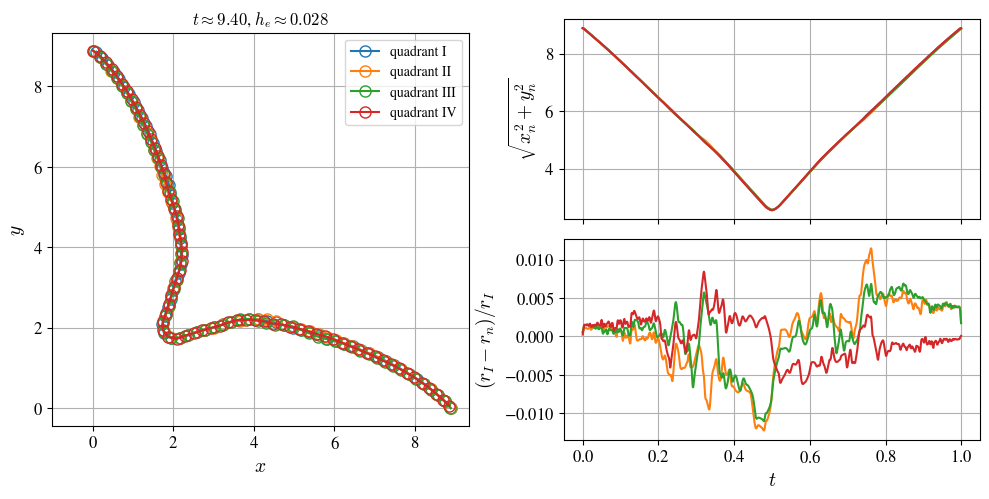

In [8]:

fig = plt.figure(tight_layout=True,figsize=(10, 5))
gs = gridspec.GridSpec(2, 2)


ax = fig.add_subplot(gs[:, 0])
text_displacements = [0.1, 0.1, 0.12, 0.15, 0.15, 0.12, 0.15]

source_files = ['../data/spline2/spline2_results_000015.h5']
for source_file in source_files:
    data = h5.File(source_file, 'r')

    # Get groups.
    groups = list(data.keys())
    positions = []
    times = []
    types = []
    for group in groups:
        if "step" not in group:
            continue

        positions.append(data[group]['domain']['pos'][:])
        types.append(data[group]['domain']['types'][:])
        times.append(data[group].attrs['time'])

    # Get conf.
    conf = data['conf']
    dendrite_h = conf.attrs.get('domain.dendrite.h')
    print("DENDRITE H", dendrite_h)
    liquid_h = conf.attrs.get('domain.liquid.h')
    L = conf.attrs.get("domain.liquid.size")

    # Close file.
    data.close()

    # Timesteps.
    # Plot.
    handles = []
    labels = []
        # Timesteps.
    time = 9.4
    closest_time = min(times, key=lambda x: abs(x-time))
    print(closest_time)
    i = times.index(closest_time)
    pos = positions[i]
    typ = types[i]


    # Plot all quadrants
    # **************
    # FIRST QUADRANT
    # **************
    idx = [j for j in range(len(pos[0])) if ((pos[0][j] >= 0) and (pos[1][j] >= 0) and (typ[j] == -2))]
    pos = pos[:, idx]
    pos = order_points(pos)
    x_1 = pos[0]
    y_1 = pos[1]

    # ax.plot(x, y, '-', color = 'tab:blue', label=r'$t\approx{:.2f}$'.format(times[timestep_idxs[i]]))
    # ax.plot(x[::8], y[::8], color = 'tab:blue', label=r'$t\approx{:.2f}$'.format(times[timestep_idxs[i]]), marker='o', fillstyle='none', ms=8)
    ax.set_title(r'$t\approx{:.2f}$, $h_e \approx {:.3f}$'.format(closest_time, dendrite_h))
    print(closest_time)
    p, = ax.plot(x_1[::8], y_1[::8], '-', label="quadrant I", marker='o', fillstyle='none', ms=8)
    if (i == 0):
        handles.append(p)
    # ax.lines.remove(p)
    # **************
    # SECOND QUADRANT
    # **************
    pos = positions[i]
    typ = types[i]
    idx = [j for j in range(len(pos[0])) if ((pos[0][j] <= 0) and (pos[1][j] >= 0) and (typ[j] == -2))]
    pos = pos[:, idx]
    pos = order_points(pos)
    x_2 = pos[0]
    y_2 = pos[1]

    # ax.plot(x, y, '-', color = 'tab:blue', label=r'$t\approx{:.2f}$'.format(times[timestep_idxs[i]]))
    # ax.plot(x[::8], y[::8], color = 'tab:blue', label=r'$t\approx{:.2f}$'.format(times[timestep_idxs[i]]), marker='o', fillstyle='none', ms=8)
    p, = ax.plot(np.abs(x_2[::8]), y_2[::8], '-', label="quadrant II", marker='o', fillstyle='none', ms=8)
    if (i == 0):
        handles.append(p)
    # ax.lines.remove(p)

    # **************
    # THIRD QUADRANT
    # **************
    pos = positions[i]
    typ = types[i]
    idx = [j for j in range(len(pos[0])) if ((pos[0][j] <= 0) and (pos[1][j] <= 0) and (typ[j] == -2))]
    pos = pos[:, idx]
    pos = order_points(pos)
    x_3 = pos[0]
    y_3 = pos[1]

    # ax.plot(x, y, '-', color = 'tab:blue', label=r'$t\approx{:.2f}$'.format(times[timestep_idxs[i]]))
    # ax.plot(x[::8], y[::8], color = 'tab:blue', label=r'$t\approx{:.2f}$'.format(times[timestep_idxs[i]]), marker='o', fillstyle='none', ms=8)
    p, = ax.plot(np.abs(x_3[::8]), np.abs(y_3[::8]), '-', label="quadrant III", marker='o', fillstyle='none', ms=8)
    if (i == 0):
        handles.append(p)
    # ax.lines.remove(p)

    # **************
    # FOURTH QUADRANT
    # **************
    pos = positions[i]
    typ = types[i]
    idx = [j for j in range(len(pos[0])) if ((pos[0][j] >= 0) and (pos[1][j] <= 0) and (typ[j] == -2))]
    pos = pos[:, idx]
    pos = order_points(pos)
    x_4 = pos[0]
    y_4 = pos[1]

    # ax.plot(x, y, '-', color = 'tab:blue', label=r'$t\approx{:.2f}$'.format(times[timestep_idxs[i]]))
    # ax.plot(x[::8], y[::8], color = 'tab:blue', label=r'$t\approx{:.2f}$'.format(times[timestep_idxs[i]]), marker='o', fillstyle='none', ms=8)
    p, = ax.plot(x_4[::8], np.abs(y_4[::8]), '-', label="quadrant IV", marker='o', fillstyle='none', ms=8)
    if (i == 0):
        handles.append(p)
    # ax.lines.remove(p)

    ax.set_aspect('equal')
    ax.grid("both")
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')


ax.legend(handles=handles, labels=['PFIC', 'MIT, $m=2$', 'MIT, $m=4$'])
ax.set_xlim(left=-1)



ax = fig.add_subplot(gs[0, 1])
positions = [[x_1, y_1], [np.abs(x_2), y_2], [np.abs(x_3), np.abs(y_3)], [x_4, np.abs(y_4)]]

for p in positions:

    ordered_points = order_points(np.array(p))

    tck, u = interpolate.splprep(ordered_points, s=0)
    unew = np.arange(0, 1.0, 0.001)
    out = interpolate.splev(unew, tck)

    ax.plot(unew, np.sqrt(out[0]*out[0]+ out[1]*out[1]))

ordered_points = order_points(np.array(positions[0]))
tck, u = interpolate.splprep(ordered_points, s=0)
unew = np.arange(0, 1.0, 0.001)
out_orig = interpolate.splev(unew, tck)
# ax.set_xlabel("$t$")
ax.set_ylabel("$\sqrt{x_n^2 + y_n^2}$")
ax.grid(True, "both")
ax1 = ax
ax = fig.add_subplot(gs[1, 1], sharex=ax1)
plt.setp(ax1.get_xticklabels(), visible=False)

for i, p in enumerate(positions):

    ordered_points = order_points(np.array(p))

    tck, u = interpolate.splprep(ordered_points, s=0)
    unew = np.arange(0, 1.0, 0.001)
    out = interpolate.splev(unew, tck)
    r1 = np.sqrt(out_orig[0] * out_orig[0] + out_orig[1] * out_orig[1])
    rn = np.sqrt(out[0] * out[0] + out[1] * out[1])
    err = (r1-rn)/r1
    print(np.max(err))
    p, = ax.plot(unew, err)
    if (i==0):
        p.remove()

ax.set_xlabel("$t$")
ax.set_ylabel("$(r_I - r_n)/r_I$")
ax.grid(True, "both")
fig.tight_layout()

if 1:
    fig.savefig('../manuscript/paper/figures/quadrants.eps', dpi=300, transparent=False, bbox_inches='tight')


../data/spline2/spline2_results_000001.h5
../data/spline2/spline2_results_000000.h5
../data/spline2/spline2_results_000011.h5
../data/spline2/spline2_results_000006.h5
../data/spline2/spline2_results_000016.h5
../data/spline2/spline2_results_000009.h5
../data/spline2/spline2_results_000007.h5
../data/spline2/spline2_results_000002.h5
../data/spline2/spline2_results_000003.h5
../data/spline2/spline2_results_000005.h5
../data/spline2/spline2_results_000004.h5
../data/spline2/spline2_results_000015.h5
../data/spline2/spline2_results_000014.h5
../data/spline2/spline2_results_000008.h5
../data/spline2/spline2_results_000010.h5
../data/spline2/spline2_results_000013.h5
../data/spline2/spline2_results_000012.h5
[0.34522273639573653, 0.15185812754610373, 0.40845350040965744, 0.15497447736139125, 0.34401225837031113, 0.26556485171124167, 0.19844249435929395, 0.2848006030412651, 0.2810127008042649, 0.24012154000625174, 0.3403617497570932, 0.13897287150544657, 0.13467669935133442, 0.4746938099413

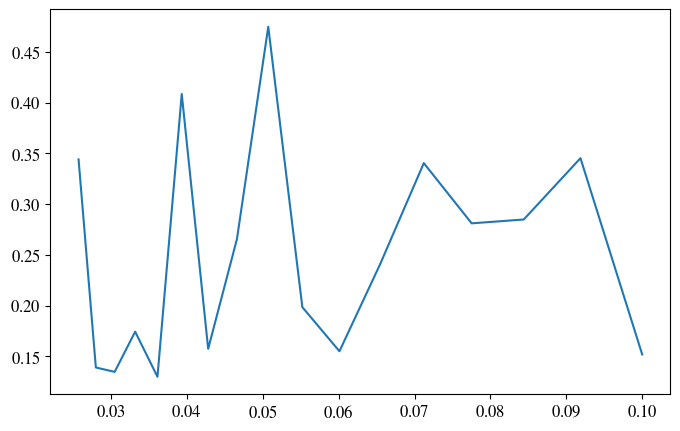

In [9]:
source_files = glob.glob("../data/spline2/spline2_results_*")

hs = []
max_errors = []
for source_file in source_files:
    print(source_file)
    data = h5.File(source_file, 'r')

    # Get groups.
    groups = list(data.keys())
    positions = []
    times = []
    types = []
    for group in groups:
        if "step" not in group:
            continue

        positions.append(data[group]['domain']['pos'][:])
        types.append(data[group]['domain']['types'][:])
        times.append(data[group].attrs['time'])

    # Get conf.
    conf = data['conf']
    dendrite_h = conf.attrs.get('domain.dendrite.h')
    hs.append(dendrite_h)
    # Close file.
    data.close()

    # Timesteps.
    time = 9.6
    closest_time = min(times, key=lambda x: abs(x-time))
    i = times.index(closest_time)
    pos = positions[i]
    typ = types[i]

    # Plot.
    handles = []
    labels = []
    # Meshless.

    # Plot all quadrants
    # **************
    # FIRST QUADRANT
    # **************
    idx = [j for j in range(len(pos[0])) if ((pos[0][j] >= 0) and (pos[1][j] >= 0) and (typ[j] == -2))]
    quadrant_pos = pos[:, idx]
    quadrant_pos_ordered = order_points(quadrant_pos)
    x_1 = quadrant_pos_ordered[0]
    y_1 = quadrant_pos_ordered[1]

    # **************
    # SECOND QUADRANT
    # **************
    idx = [j for j in range(len(pos[0])) if ((pos[0][j] <= 0) and (pos[1][j] >= 0) and (typ[j] == -2))]
    quadrant_pos = pos[:, idx]
    quadrant_pos_ordered = order_points(quadrant_pos)
    x_2 = quadrant_pos_ordered[0]
    y_2 = quadrant_pos_ordered[1]

    # **************
    # THIRD QUADRANT
    # **************
    idx = [j for j in range(len(pos[0])) if ((pos[0][j] <= 0) and (pos[1][j] <= 0) and (typ[j] == -2))]
    quadrant_pos = pos[:, idx]
    quadrant_pos_ordered = order_points(quadrant_pos)
    x_3 = quadrant_pos_ordered[0]
    y_3 = quadrant_pos_ordered[1]

    # **************
    # FOURTH QUADRANT
    # **************
    idx = [j for j in range(len(pos[0])) if ((pos[0][j] >= 0) and (pos[1][j] <= 0) and (typ[j] == -2))]
    quadrant_pos = pos[:, idx]
    quadrant_pos_ordered = order_points(quadrant_pos)
    x_4 = quadrant_pos_ordered[0]
    y_4 = quadrant_pos_ordered[1]


    # Evaluate.
    positions = [[x_1, y_1], [np.abs(x_2), y_2], [np.abs(x_3), np.abs(y_3)], [x_4, np.abs(y_4)]]
    ordered_points = order_points(np.array(positions[0]))
    tck, u = interpolate.splprep(ordered_points, s=0)
    unew = np.arange(0, 1.0, 0.001)
    out_orig = interpolate.splev(unew, tck)

    errors = []
    for i, p in enumerate(positions[1:]):

        ordered_points = order_points(np.array(p))

        tck, u = interpolate.splprep(ordered_points, s=0)
        unew = np.arange(0, 1.0, 0.001)
        out = interpolate.splev(unew, tck)
        err = (out_orig[0] - out[0]) + (out_orig[1] - out[1])
        errors.append(np.max(np.abs(err)))

    max_errors.append(np.max(errors))




fig, ax = plt.subplots(1, 1, figsize=(8, 5))
print(max_errors)
hs, max_errors = zip(*sorted(zip(hs, max_errors)))
ax.plot(hs, max_errors)

# if 1:
#     fig.savefig('../manuscript/paper/figures/quadrants.eps', dpi=300, transparent=False, bbox_inches='tight')

In [10]:
np.max(x_4)

8.875239605859873